# Salary Estimation Portfolio

---
**Placement season is on the run!** 

With the December session drawing to a close, here's a visualization of how ECE seniors in my University delivered.

---

**Libraries imported**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats

In [2]:
df = pd.read_csv('salaries.csv')

In [3]:
len(df)

96

In [4]:
df.columns

Index(['CTC', 'Sector', 'Gender'], dtype='object')

Above is a dataframe of 96 students who've bagged offers, however, **there are more to get placed, so we only have sample data.**

The column attributes are **CTC**, **Sector** and **Gender**.

In [5]:
#CTC -- Cost to Company (Compensation)

#Shifting units to LPA (Lakhs per Annum)

df['CTC'] = df['CTC'].apply(lambda salary: salary/10**5)

In [6]:
#stats rounded to 2 decimal places

np.round(df.describe(),2)

,CTC
count,96.00
mean,10.08
std,3.96
min,3.60
25%,7.97
50%,8.62
75%,13.00
max,27.22


The minimum stands at 3.6L while the maximum so far, is ~27.22L.The top 50% made over 8.62L while those over the 75th percentile made over 27.22L

---
## Analyzing Sector-wise split-up

In [7]:
#REORDER SECTORS IN DESCENDING ORDER OF COUNT
ind = df.groupby('Sector').count()['CTC'].sort_values(ascending=False).index

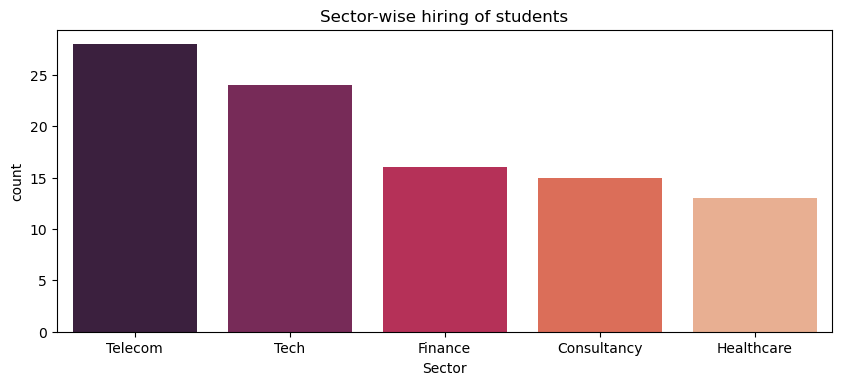

In [8]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(data=df,x='Sector',palette='rocket',order=ind)
plt.title('Sector-wise hiring of students')
plt.show()

In [9]:
#REORDER SECTORS IN DESCENDING ORDER OF MEAN SALARY
ind = df.groupby('Sector').mean()['CTC'].sort_values(ascending=False).index

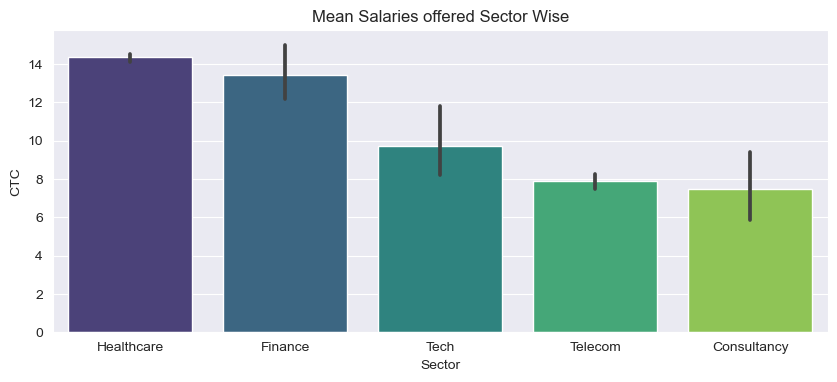

In [10]:
plt.figure(figsize=(10,4),dpi=100)
sns.set_style(style='darkgrid')
plt.title('Mean Salaries offered Sector Wise')
sns.barplot(data=df,x='Sector',y='CTC',estimator=np.mean,palette='viridis',order=ind)
plt.show()

## Which sector pays the most?

The maximum salaries offered sectorwise are given:

In [11]:
#REORDER SECTORS IN DESCENDING ORDER OF MAX SALARY
max_vals = df.groupby('Sector').max()['CTC']
ind = df.groupby('Sector').max()['CTC'].sort_values(ascending=False).index

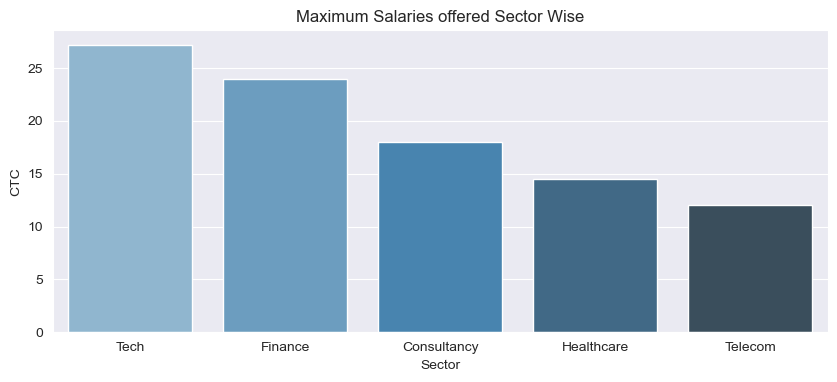

In [12]:
plt.figure(figsize=(10,4),dpi=100)
sns.set_style(style='darkgrid')
plt.title('Maximum Salaries offered Sector Wise')
sns.barplot(data=max_vals.reset_index(),x='Sector',y='CTC',palette='Blues_d',order=ind)
plt.show()

### Takeaway

**The Telecom Industry offered maximum jobs, the Tech Industry offered maximum pay, while the Healthcare industry offered maximum average pay.**

In [13]:
np.round(df.groupby('Sector').agg(['count','mean','max']),2)

CTC              
            count   mean    max
Sector                         
Consultancy    15   7.46  18.00
Finance        16  13.44  24.00
Healthcare     13  14.36  14.50
Tech           24   9.72  27.22
Telecom        28   7.87  12.00

---
## Analyzing Gender-wise split-up

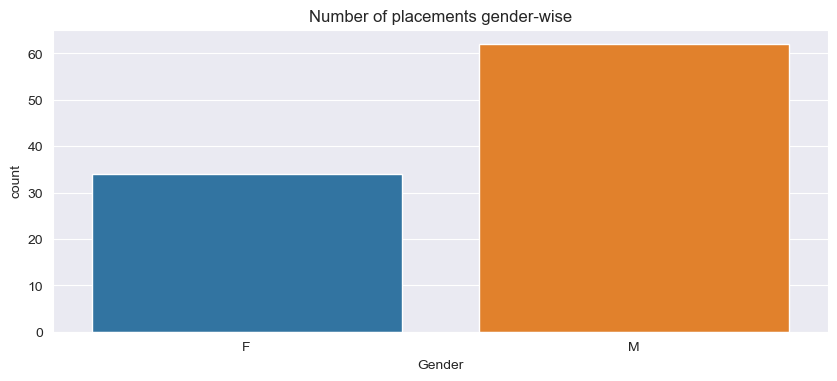

In [14]:
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(data=df,x='Gender')
plt.title('Number of placements gender-wise')
plt.show()

For every female candidate, there were 2 male candidates who were placed.

### How did male and female candidates perform?

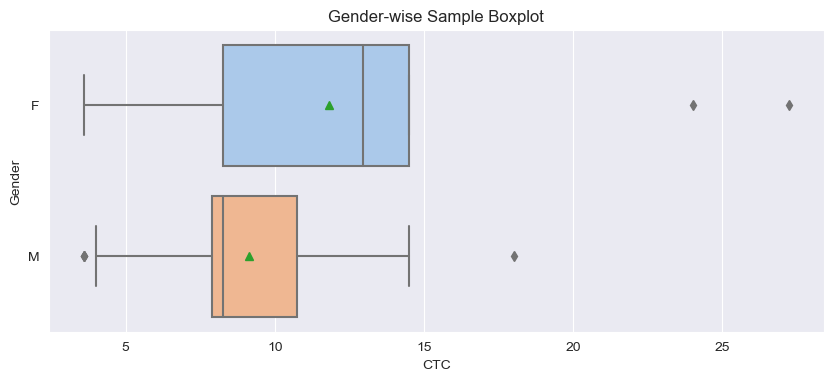

In [15]:
plt.figure(figsize=(10,4),dpi=100)
plt.title('Gender-wise Sample Boxplot')
sns.boxplot(data=df,x='CTC',y='Gender',palette='pastel',showmeans=True)
plt.show()

Going by the mean and the median, female candidates outdid males.

## Is there gender bias in compensation ?

In [16]:
#group males sector-wise by mean salary
CTC_males = df[df['Gender'] == 'M'].groupby('Sector').mean()

#group females sector-wise by mean salary
CTC_females = df[df['Gender'] == 'F'].groupby('Sector').mean()

bias = np.round(pd.merge(CTC_males,CTC_females,on='Sector',),2)
bias.columns = ['Male','Female']

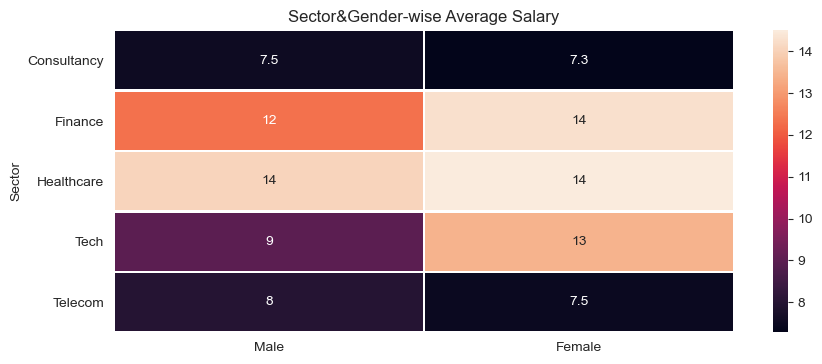

In [17]:
plt.figure(figsize=(10,4),dpi=100)
sns.heatmap(data=bias,annot=True,lw=1)
plt.title('Sector&Gender-wise Average Salary')
plt.show()

Except for the finance and the Tech sector (due to outliers), there is no notable difference in compensation.

---
## Analyzing overall data
Below is a Histogram coupled with a Kernel density approximator visualizing the probability of bagging a package.

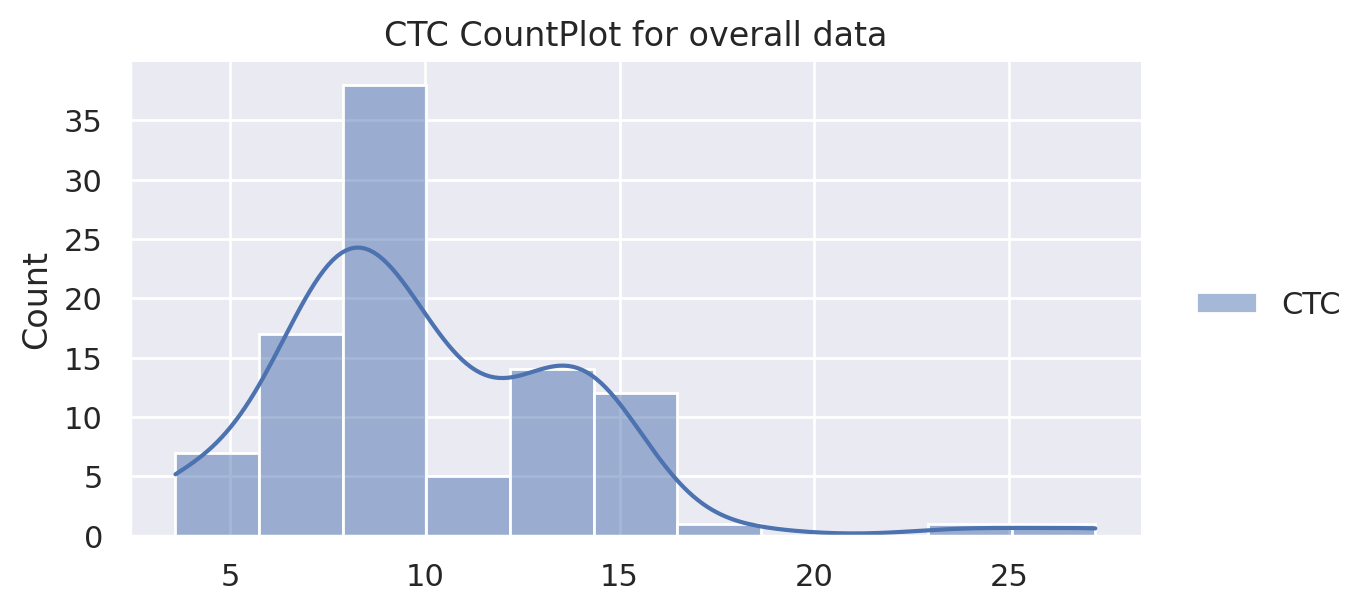

In [18]:
sns.set_style(style='darkgrid')
sns.set(rc={"figure.dpi":200})
sns.displot(df,kde=True,height=3,aspect=2)
sns.reset_orig()
plt.title('CTC CountPlot for overall data');

**NOTE: The X axis is adjusted in lakhs per annum**

---
The Kernel Density Approximation is produced via stacking Standard Normal Distributions over every sample salary point,and then summing and normalizing to get the sample's prob. density function. 

<Figure size 1600x800 with 0 Axes>

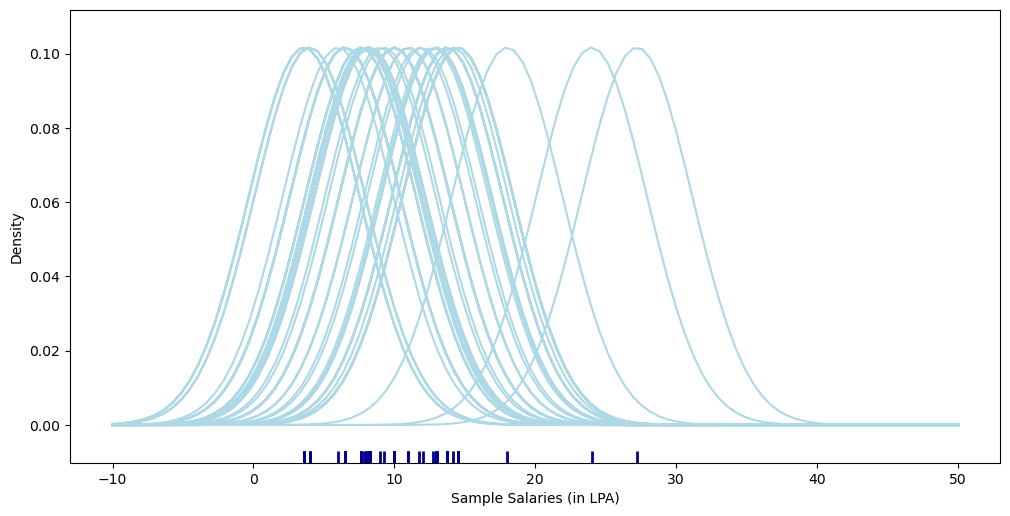

In [19]:
sns.reset_orig()
x = df['CTC'].values
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-10, 50, 100)

kernels = []

plt.figure(figsize=(12,6),dpi=100)
plt.xlabel('Sample Salaries (in LPA)')
plt.ylabel('Density')

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="lightblue")

    #to display individual salaries
sns.rugplot(x, color="darkblue", linewidth=2);

<Figure size 1600x800 with 0 Axes>

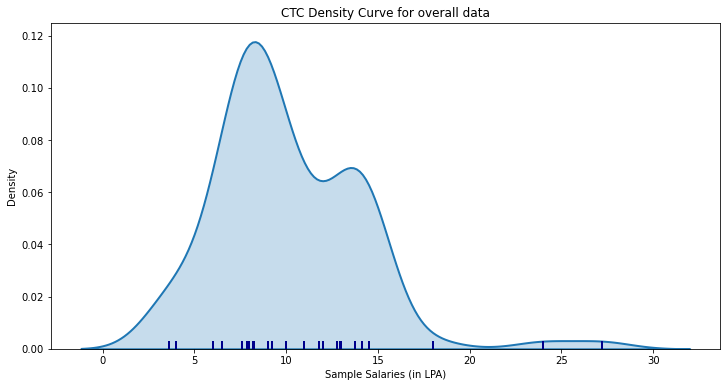

In [20]:
sns.reset_orig()
plt.figure(figsize=(8,4),dpi=200)
bandwidth = x.std() * x.size ** (-0.001)
support = np.linspace(-10, 50, 100)

kernels = []

plt.figure(figsize=(12,6))
plt.xlabel('Sample Salaries (in LPA)')
plt.ylabel('Density')

for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)

sns.rugplot(x, color="darkblue", linewidth=2);
plt.ylim([0,0.125])
plt.title('CTC Density Curve for overall data')
sns.kdeplot(x,linewidth=2,shade=True);

The data is right skewed; while the majority were offered ~90k a month, few others crossed the 12LPA mark, and the two instances over 20LPA are outliers.. 

In [21]:
df.skew()

CTC    1.266109
dtype: float64

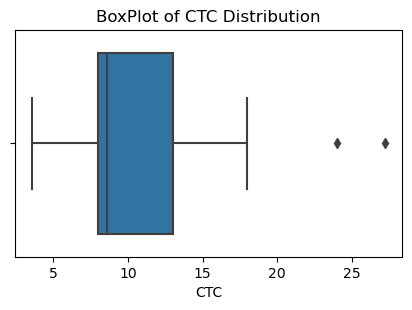

In [22]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(data=df,x='CTC')
plt.title('BoxPlot of CTC Distribution')
plt.show()

#TWO OUTLIERS ARE ON THE RIGHT

---



## Final Question: 

**Can we make claims on the population before we have access to this information?** 

In other words, what can be said about the overall department average, even before all the students are placed? 

To answer this, we test a hypothesis: the **TRUE AVERAGE** is say, 11LPA.

To perform this test, we rely on inferential statistics.
Since we don't have access to the Population's Standard Deviation, we use the **Student's T-distribution**, which looks much like the **Gaussian distribution**, but with fatter tails.

---
<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/72cbe32d684449906a1abc4a9a6087e66eaa3178">

where <img src = https://wikimedia.org/api/rest_v1/media/math/render/svg/c15bbbb971240cf328aba572178f091684585468> 
is the number of degrees of freedom (df) and 
<img src = https://wikimedia.org/api/rest_v1/media/math/render/svg/4cfde86a3f7ec967af9955d0988592f0693d2b19> 
is the gamma function.

Here, df = (sample size)-1 = 96-1 = 95

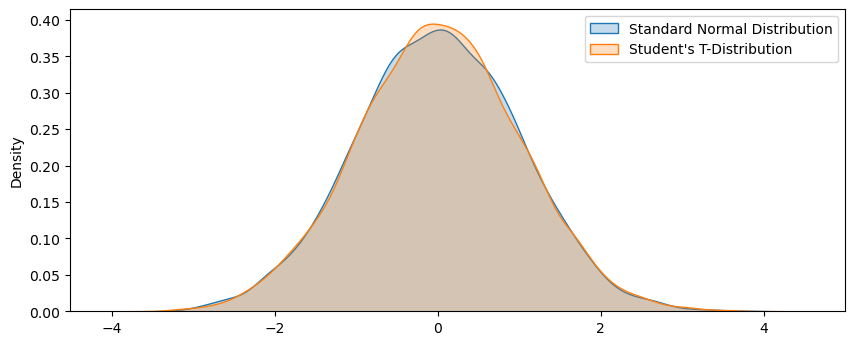

In [23]:
np.random.seed(100)

#GENERATE RANDOM SAMPLES FROM BOTH DISTRIBUTIONS TO COMPARE THEIR PLOTS

norm_values = np.random.randn(10000)
t_values = np.random.standard_t(df=95,size=10000)

plt.figure(figsize=(10,4),dpi=100)
sns.kdeplot(data=norm_values,fill=True,label='Standard Normal Distribution')
sns.kdeplot(data=t_values,fill=True,legend=True,label="Student's T-Distribution")
plt.legend();

The takeaway is that the T-distribution converges with the Normal Distribution as the sample size grows. 

---

The **Null Hypothesis** is :         True Mean = 11,00,000 LPA

**Alternate Hypothesis** is : True Mean != 11,00,000LPA

The T-score is used to estimate our chances via a two-sided t-test. The T-score simply conveys how many "standard errors" away the sample mean is from the hypothesized mean, the lower it is, higher is the probability of accepting the null hypothesis, and vice-versa.  

<img src = https://www.isobudgets.com/wp-content/uploads/2016/02/t-score-equation-e1456854317764.jpg>

In [24]:
#xbar
sample_mean = np.round(float(df.mean()),2)  #IN LPA

#mu
hypothesized_mean = 11 #IN LPA

#s
sample_deviation = np.round(float(df.std()),2)  

#n 
sample_size = len(df)

#t
T_score = (sample_mean-hypothesized_mean)/(sample_deviation/sample_size**0.5)

The final T-score is:

In [25]:
T_score

-2.276293498343963

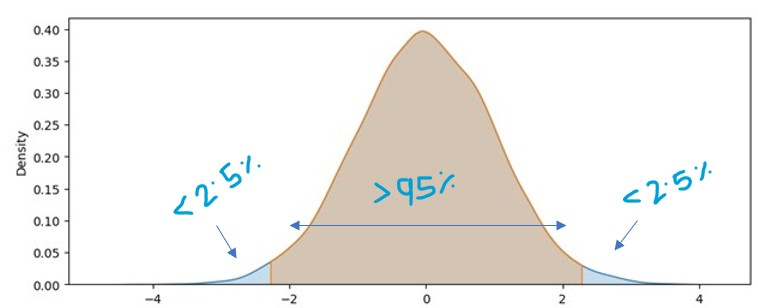

In [26]:
from IPython.display import Image
Image(filename ="prob.jpg")

**From the standard 68%-95%-99.7% rule, we can show that the probability of the TRUE AVERAGE being around 11LPA is below 2.5% !**

Using **Sci-Py**'s one-sample t-test, we show that the **p-value** we've found earlier agrees with our plot:

In [27]:
t_score,pvalue = stats.ttest_1samp(df['CTC'].values,11) #returns tuple of T-score and p-value 

pd.DataFrame(data={'T SCORE':t_score,'P VALUE':pvalue},index=[0])

,T SCORE,P VALUE
0,-2.280764,0.024797


---
## What does this mean for us?

Is the estimated mean salary lower than 11LPA or higher?  To answer this, we go for confidence intervals.

Confidence Intervals provide, with some "confidence" in terms of probability, the expected range of a population parameter, simply by using sample statistics.

<img src = https://www.isobudgets.com/wp-content/uploads/2016/02/confidence-interval-unknown-standard-deviation.jpg>

<img src = "https://s3-us-west-2.amazonaws.com/courses-images/wp-content/uploads/sites/1729/2017/04/15032548/m10_inference_mean_topic_10_2_m10_est_pop_means_3_image1.png">

If we'd like higher confidence, the critical value is higher, thereby increasing the error margin.

Larger the sample size, more certainty there is, and so smaller is the error margin.

Larger the sample deviation, more certainty there is, and so smaller is the error margin.

In [28]:
#xbar
sample_mean = np.round(float(df.mean()),2)  #IN LPA

# t / Tc

#95% confidence level
critical_value_95 = scipy.stats.t.ppf(q=1-0.05/2,df=95)

#99% confidence level
critical_value_99 = scipy.stats.t.ppf(q=1-0.01/2,df=99)

#s
sample_deviation = np.round(float(df.std()),2)  

#n 
sample_size = len(df)

The 95% confidence estimate of **TRUE AVERAGE** in LPA is:

In [29]:
np.round([sample_mean-critical_value_95*sample_deviation/sample_size**0.5,sample_mean+critical_value_95*sample_deviation/sample_size**0.5],2)

array([ 9.28, 10.88])

The 99% confidence estimate of **TRUE AVERAGE** is:

In [30]:
np.round([sample_mean-critical_value_99*sample_deviation/sample_size**0.5,sample_mean+critical_value_99*sample_deviation/sample_size**0.5],2)

array([ 9.02, 11.14])

## To be 99% sure, we'd expect this year's average between 9.02 and 11.14 LPA.

---
### Finally, a branch wise 95% CI estimate package in LPA is shown:

### Tech

[ 7.91, 11.53]

### Finance

[12.16, 14.72]

### Healthcare

[14.09, 14.63]

### Consultancy

[5.59, 9.33]

### Telecom

[7.45, 8.29]

---